In [1]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import read_quote      as rq
import stock_functions as sf
import df_visualizations as dv
import remap_values as rv

import sys
import time

In [2]:
%matplotlib inline
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (14, 10)

colorz = [ 'white', 'red', 'blue', 'green', 'orange', 'cyan', 'olivedrab', 'darkred', 'steeleblue', 'seagreen' ]

In [3]:
inpFile = 'quotes/aapl.csv'
ibm_quote = rq.readQuote( inpFile )

In [4]:
roll_nums = [3,5,10,15,20,25,30]
mom_nums  = [3,5,10,20,30]
rsi_nums  = [10,15,20,25,30]
band_nums = [3,5,10,15,20]

In [5]:
diffs = sf.generate_differentials   ( ibm_quote            )
rolls = sf.generate_rolling_close   ( ibm_quote, roll_nums )
moms  = sf.generate_momentum_close  ( ibm_quote, mom_nums  )
rsi   = sf.generate_rsi             ( ibm_quote, rsi_nums  )
bands = sf.generate_bollinger_bands ( ibm_quote, band_nums )

In [6]:
foo = ibm_quote[['close','open']].copy()
for i in roll_nums:
    foo['close_mean_'+str(i)] = rolls['close_mean_'+str(i)]
foo = foo.drop( 'open', axis=1 )
foo.head()

,close,close_mean_3,close_mean_5,close_mean_10,close_mean_15,close_mean_20,close_mean_25,close_mean_30
date,,,,,,,,
2017/03/10,139.14,138.940000,139.136,138.813,138.056667,137.10675,135.8998,133.990167
2017/03/09,138.68,139.066667,139.264,138.565,137.803667,136.77075,135.4754,133.416833
2017/03/08,139.00,139.286667,139.320,138.350,137.592333,136.43875,135.0782,132.856833
2017/03/07,139.52,139.546667,139.478,138.161,137.327000,136.06525,134.3722,132.222500
2017/03/06,139.34,139.360000,138.972,137.879,136.911667,135.60375,133.6566,131.574500


In [23]:
bar          = foo.copy()
bar['close'] = ( foo.shift(1) / foo - 1 )
for i in [3,5,10]:
    bar['close_mean_'+str(i)] = ( foo['close_mean_'+str(i)].shift(i) / foo['close_mean_'+str(i)] - 1 )    
bar = bar[['close','close_mean_3','close_mean_5','close_mean_10']]
bar = bar.replace([np.inf, -np.inf], np.nan).fillna(0)
bar.head()

,close,close_mean_3,close_mean_5,close_mean_10
date,,,,
2017/03/10,0.000000,0.000000,0.0,0.0
2017/03/09,0.003317,0.000000,0.0,0.0
2017/03/08,-0.002302,0.000000,0.0,0.0
2017/03/07,-0.003727,-0.004347,0.0,0.0
2017/03/06,0.001292,-0.002105,0.0,0.0


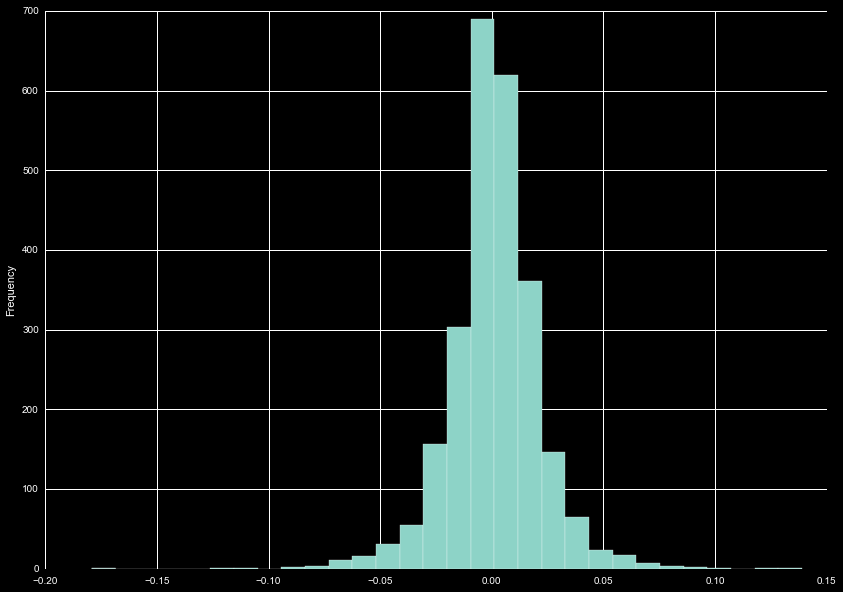

In [8]:
bar['close'].plot.hist( bins=30 )

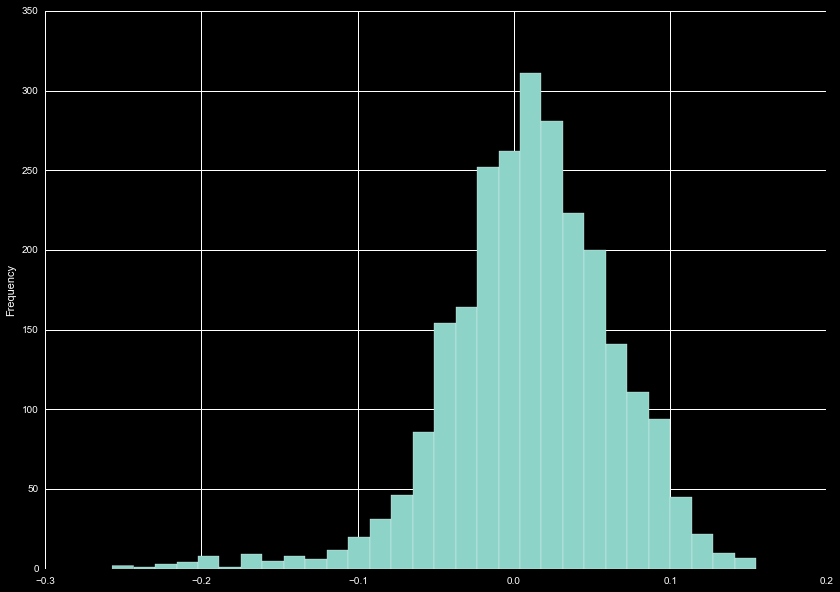

In [24]:
bar['close_mean_10'].plot.hist( bins=30 )

In [9]:
bar['close_mean_10'].describe()

count    2519.000000
mean        0.010764
std         0.053286
min        -0.257174
25%        -0.018898
50%         0.012317
75%         0.045105
max         0.155060
Name: close_mean_10, dtype: float64

/home/sean/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


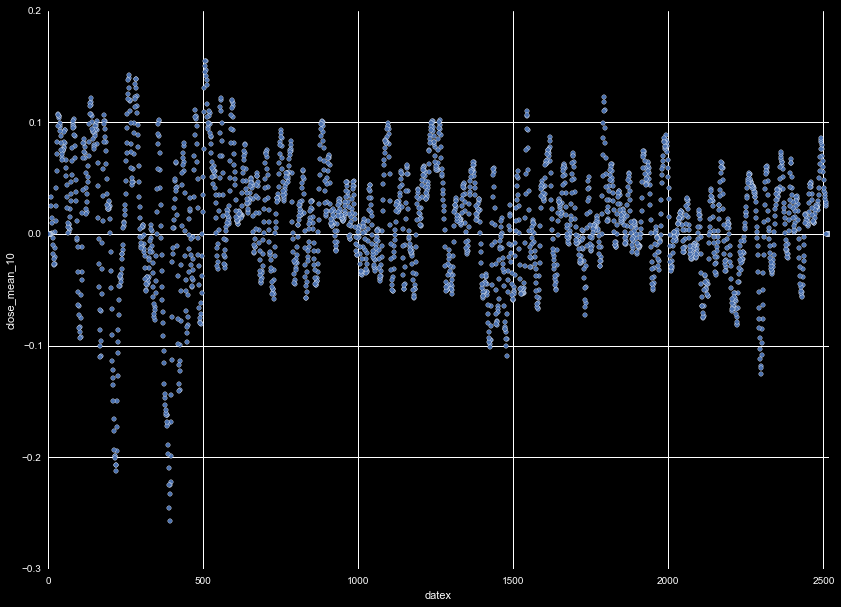

In [10]:
foobar = bar.copy()
foobar['datex'] = np.arange( bar.shape[0], 0, -1 )
foobar.plot.scatter( x='datex', 
                     y='close_mean_10', 
                     xlim=[0,bar.shape[0]] )

In [11]:
foobar = bar.join( diffs, how='inner' )

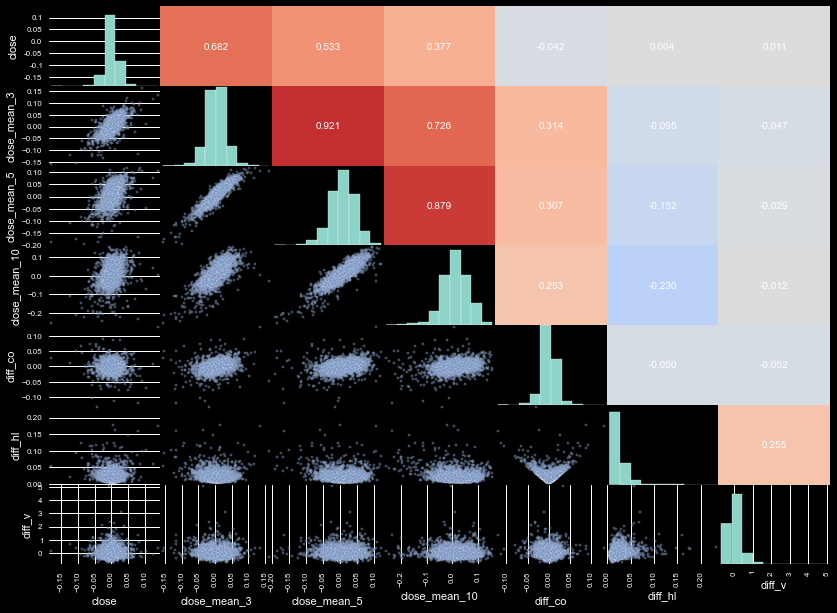

In [12]:
dv.corr_plot( foobar, corr_method = 'pearson')

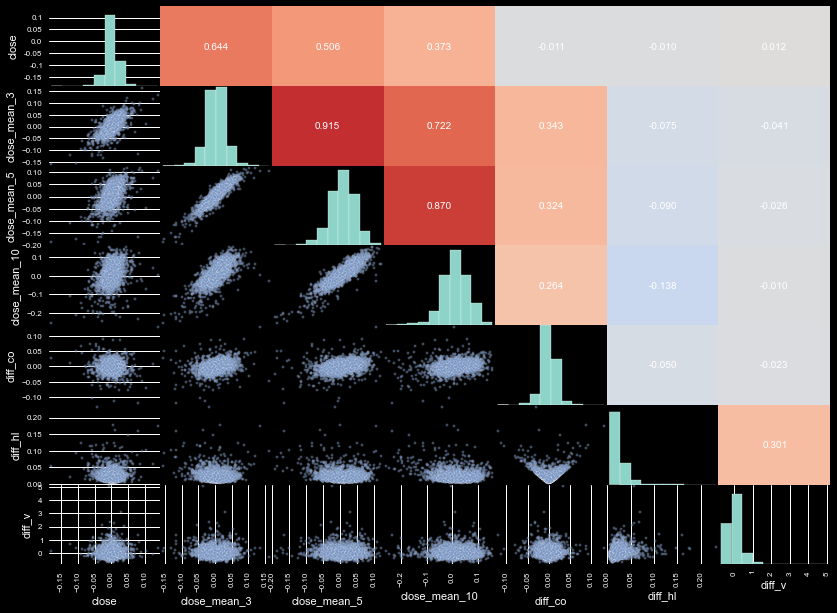

In [13]:
dv.corr_plot( foobar )

In [14]:
print diffs.corrwith( bar['close']         )
print diffs.corrwith( bar['close_mean_3']  )
print diffs.corrwith( bar['close_mean_5']  )
print diffs.corrwith( bar['close_mean_10'] )

diff_co   -0.042241
diff_hl    0.004075
diff_v     0.010845
dtype: float64
diff_co    0.313930
diff_hl   -0.095424
diff_v    -0.046965
dtype: float64
diff_co    0.306596
diff_hl   -0.152122
diff_v    -0.028706
dtype: float64
diff_co    0.253269
diff_hl   -0.229734
diff_v    -0.012014
dtype: float64


In [91]:
# Diffs appear to be useful

In [15]:
foobar = bar.join( moms, how='inner' )

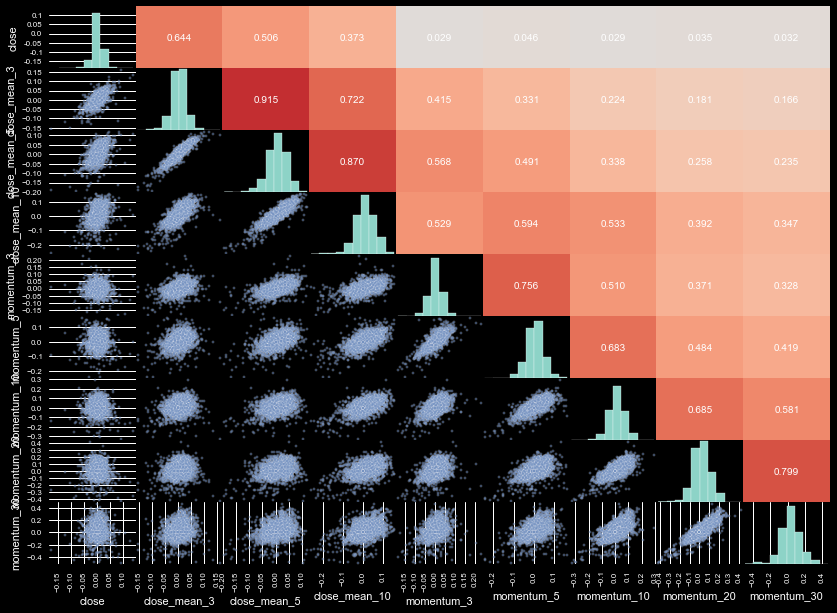

In [16]:
dv.corr_plot( foobar )

In [17]:
print moms.corrwith( bar['close']         )
print moms.corrwith( bar['close_mean_3']  )
print moms.corrwith( bar['close_mean_5']  )
print moms.corrwith( bar['close_mean_10'] )

momentum_3    -0.022810
momentum_5     0.008488
momentum_10    0.002878
momentum_20    0.017353
momentum_30    0.024501
dtype: float64
momentum_3     0.394782
momentum_5     0.322836
momentum_10    0.231665
momentum_20    0.189530
momentum_30    0.177780
dtype: float64
momentum_3     0.566341
momentum_5     0.497848
momentum_10    0.365133
momentum_20    0.289508
momentum_30    0.266290
dtype: float64
momentum_3     0.535216
momentum_5     0.614851
momentum_10    0.580882
momentum_20    0.451922
momentum_30    0.400854
dtype: float64


In [115]:
# Momentum 3 5 and 10 do decent job

In [18]:
foobar = bar.join( rsi, how='inner' )

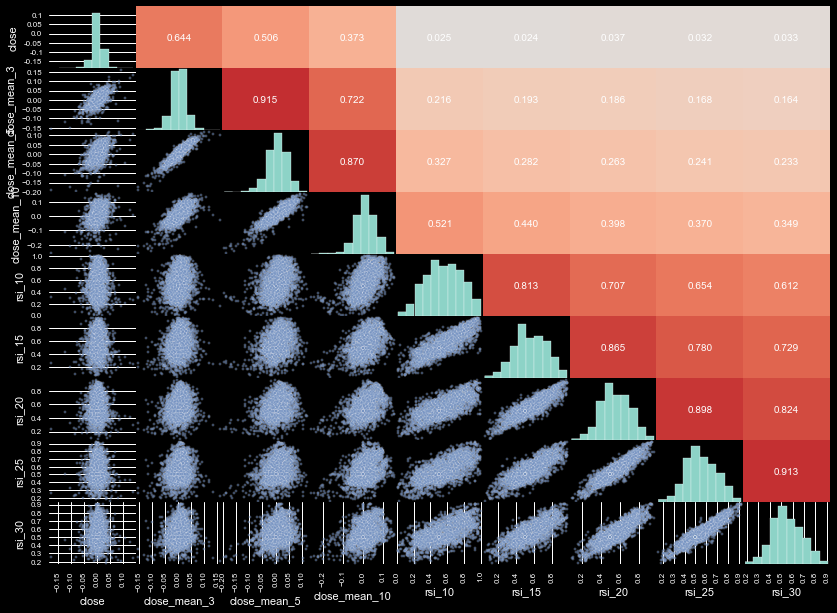

In [19]:
dv.corr_plot( foobar )

In [20]:
print rsi.corrwith( bar['close']         )
print rsi.corrwith( bar['close_mean_3']  )
print rsi.corrwith( bar['close_mean_5']  )
print rsi.corrwith( bar['close_mean_10'] )

rsi_10    0.009438
rsi_15    0.016194
rsi_20    0.026258
rsi_25    0.025232
rsi_30    0.024821
dtype: float64
rsi_10    0.203182
rsi_15    0.194140
rsi_20    0.183998
rsi_25    0.172829
rsi_30    0.164026
dtype: float64
rsi_10    0.321231
rsi_15    0.294740
rsi_20    0.275214
rsi_25    0.257801
rsi_30    0.246893
dtype: float64
rsi_10    0.516107
rsi_15    0.453480
rsi_20    0.420955
rsi_25    0.394540
rsi_30    0.373486
dtype: float64


In [119]:
# RSI 10, 15 good

In [21]:
foobar = bar.join( bands, how='inner' )

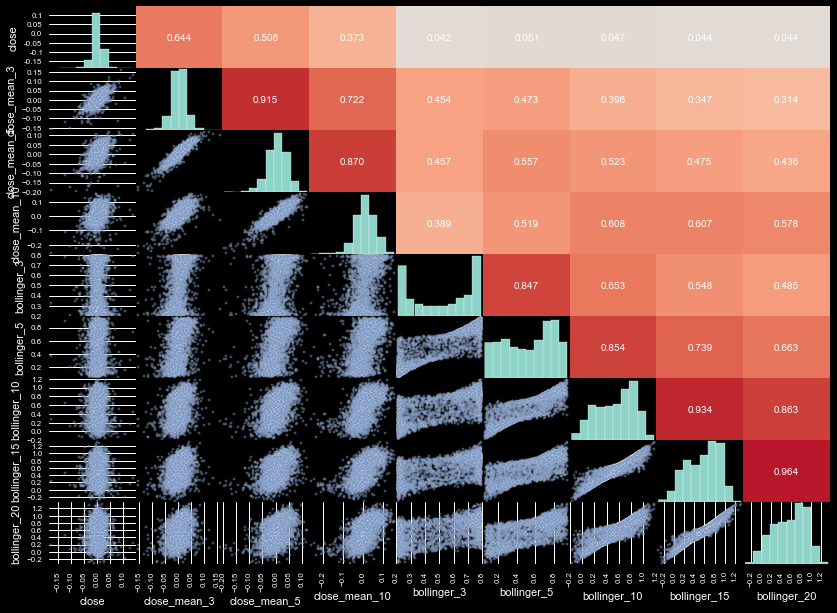

In [22]:
dv.corr_plot( foobar )

In [127]:
print bands.corrwith( bar['close']         )
print bands.corrwith( bar['close_mean_3']  )
print bands.corrwith( bar['close_mean_5']  )
print bands.corrwith( bar['close_mean_10'] )

bollinger_3    -0.016157
bollinger_5    -0.021850
bollinger_10   -0.030471
bollinger_15   -0.028346
bollinger_20   -0.026081
dtype: float64
bollinger_3     0.385588
bollinger_5     0.372848
bollinger_10    0.295191
bollinger_15    0.260574
bollinger_20    0.237126
dtype: float64
bollinger_3     0.392112
bollinger_5     0.456536
bollinger_10    0.417366
bollinger_15    0.383613
bollinger_20    0.357781
dtype: float64
bollinger_3     0.308717
bollinger_5     0.408207
bollinger_10    0.513754
bollinger_15    0.518946
bollinger_20    0.506777
dtype: float64


In [128]:
# bollinger_3, 5, 10, 15 - all good for predictive means around that number of days